Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7311 - loss: 0.5852 - val_accuracy: 0.7826 - val_loss: 0.4581
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8655 - loss: 0.4374 - val_accuracy: 0.8913 - val_loss: 0.3569
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8949 - loss: 0.3468 - val_accuracy: 0.9130 - val_loss: 0.2940
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9242 - loss: 0.2888 - val_accuracy: 0.9130 - val_loss: 0.2522
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9438 - loss: 0.2489 - val_accuracy: 0.9130 - val_loss: 0.2220
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9511 - loss: 0.2193 - val_accuracy: 0.9348 - val_loss: 0.1993
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9560 - loss: 0.1965 - val_accuracy: 0.9348 - val_loss: 0.1819
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9609 - loss: 0.1782 - val_accuracy: 0.9348 - 

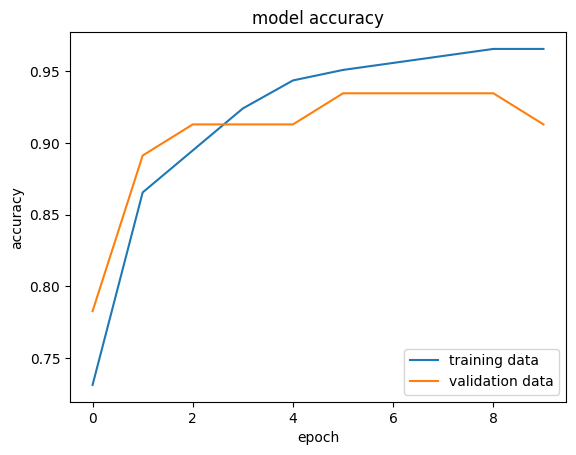

In [21]:
#Import All the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Load The Dataset
df_1=sklearn.datasets.load_breast_cancer()

#Converting the dataframe
tf.random.set_seed(3)
df=pd.DataFrame(df_1.data,columns=df_1.feature_names)

#Data Preprocessing
df["label"]=df_1.target
scaler=StandardScaler()
X=df.drop("label",axis=1)
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=df["label"]

#Model Training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=keras.Sequential([keras.layers.Input(shape=(30,)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
                       ])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10,batch_size=32)

#Plotting The Model as Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc="lower right")

#Model Accuracy And Loss
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss:{loss:.4f}")
print(f"Test Accuracy:{accuracy:.4f}")

In [13]:
df["label"].value_counts()

label
1    357
0    212
Name: count, dtype: int64